# Get Average Ratings and Review Counts through Goodreads API

### Abstract
We are working on a books dataset and will be extracting book data from 3 diffrent data sources (API,Web Scraping,csv) and then will be wrangling them together to form a single dataset. We will perform several operations over the dataset we extracted to make the data clean, error free, and consistent. After that we will be developing a database from using the extracted source data and display it in the form of an ERD (Entity-Relationship Diagram). The dataset used is The Book Database (Goodreads) it contains details about books and other aspects

### DATA

Data gathered is from the API mentioned below. Data consists of:



### Importing Libraries

In [8]:
import requests
import pandas as pd
import json
import os
import numpy as np

### DATASOURCE 1 - Using API

### Importing the dataset using API

In [9]:
api_key = 'oziLg0ZKKztlPTL0E4Q'

### Downloading the first 100 results of books through Goodreads API

In [10]:
# First we are initiating two empty list for storing the raw data
rawbooksJsonData=[]
books=[]

gettopbookreviews = 'https://www.goodreads.com/book/review_counts.json?key=oziLg0ZKKztlPTL0E4Q&isbns='

### Visit the link to see the dataset that we are working with 

In [11]:
# Merged the link and the API key to visit the full link
print(gettopbookreviews)

https://www.goodreads.com/book/review_counts.json?key=oziLg0ZKKztlPTL0E4Q&isbns=


### Retreiving isbn data from csv file

In [12]:
isbndata=pd.read_csv('C:/Users/Abhishek/Downloads/books.csv')

In [13]:
isbnlist=isbndata['isbn'].values.tolist()[:100]

In [14]:
for isbn in isbnlist:
    gettopbookreviews = gettopbookreviews+isbn+","

### Fetching results for top books in Json format

In [15]:
# Iterating for 100 books and fetching the results in json format for the top books
bookData = requests.get(gettopbookreviews)
rawbooksJsonData.append(bookData.json())

### Printing the above generated data(movieData) in json format 

In [16]:
# Printing result in json format
bookData.json()

{'books': [{'id': 5,
   'isbn': '043965548X',
   'isbn13': '9780439655484',
   'ratings_count': 2320033,
   'reviews_count': 3020225,
   'text_reviews_count': 36089,
   'work_ratings_count': 2530615,
   'work_reviews_count': 3336761,
   'work_text_reviews_count': 49479,
   'average_rating': '4.56'},
  {'id': 14,
   'isbn': '1400052920',
   'isbn13': '9781400052929',
   'ratings_count': 4893,
   'reviews_count': 8942,
   'text_reviews_count': 454,
   'work_ratings_count': 1318454,
   'work_reviews_count': 2052854,
   'work_text_reviews_count': 27347,
   'average_rating': '4.22'},
  {'id': 21,
   'isbn': '076790818X',
   'isbn13': '9780767908184',
   'ratings_count': 246838,
   'reviews_count': 547466,
   'text_reviews_count': 9332,
   'work_ratings_count': 269003,
   'work_reviews_count': 600665,
   'work_text_reviews_count': 11322,
   'average_rating': '4.21'},
  {'id': 25,
   'isbn': '076790382X',
   'isbn13': '9780767903820',
   'ratings_count': 49153,
   'reviews_count': 85895,
   '

In [17]:
# making a table from the json data
pd.DataFrame.from_dict(bookData.json())

,books
0,"{'id': 5, 'isbn': '043965548X', 'isbn13': '978..."
1,"{'id': 14, 'isbn': '1400052920', 'isbn13': '97..."
2,"{'id': 21, 'isbn': '076790818X', 'isbn13': '97..."
3,"{'id': 25, 'isbn': '076790382X', 'isbn13': '97..."
4,"{'id': 40, 'isbn': '193337201X', 'isbn13': '97..."
5,"{'id': 45, 'isbn': '097669400X', 'isbn13': '97..."
6,"{'id': 51, 'isbn': '1557344493', 'isbn13': '97..."
7,"{'id': 54, 'isbn': '1575606240', 'isbn13': '97..."
8,"{'id': 55, 'isbn': '1595580271', 'isbn13': '97..."
9,"{'id': 57, 'isbn': '1595962808', 'isbn13': '97..."


In [18]:
bookData.json()['books']

[{'id': 5,
  'isbn': '043965548X',
  'isbn13': '9780439655484',
  'ratings_count': 2320033,
  'reviews_count': 3020225,
  'text_reviews_count': 36089,
  'work_ratings_count': 2530615,
  'work_reviews_count': 3336761,
  'work_text_reviews_count': 49479,
  'average_rating': '4.56'},
 {'id': 14,
  'isbn': '1400052920',
  'isbn13': '9781400052929',
  'ratings_count': 4893,
  'reviews_count': 8942,
  'text_reviews_count': 454,
  'work_ratings_count': 1318454,
  'work_reviews_count': 2052854,
  'work_text_reviews_count': 27347,
  'average_rating': '4.22'},
 {'id': 21,
  'isbn': '076790818X',
  'isbn13': '9780767908184',
  'ratings_count': 246838,
  'reviews_count': 547466,
  'text_reviews_count': 9332,
  'work_ratings_count': 269003,
  'work_reviews_count': 600665,
  'work_text_reviews_count': 11322,
  'average_rating': '4.21'},
 {'id': 25,
  'isbn': '076790382X',
  'isbn13': '9780767903820',
  'ratings_count': 49153,
  'reviews_count': 85895,
  'text_reviews_count': 2203,
  'work_ratings_co

### Cleaning and auditing the data in books

In [19]:
selectedColumns = ['id', 'isbn', 'isbn13','average_rating','ratings_count', \
                   'text_reviews_count', 'work_ratings_count','work_reviews_count','work_text_reviews_count']
bookDataFrame = pd.DataFrame(bookData.json()['books'], columns = selectedColumns)
bookDataFrame.describe()

,id,ratings_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count
count,21.000000,2.100000e+01,21.000000,2.100000e+01,2.100000e+01,21.000000
mean,67.952381,1.287193e+05,2557.857143,2.351877e+05,3.147107e+05,5936.095238
std,38.994200,5.051153e+05,7994.841107,6.102512e+05,8.283951e+05,12491.835309
min,5.000000,6.000000e+00,0.000000,6.000000e+00,1.200000e+01,0.000000
25%,45.000000,5.200000e+01,4.000000,8.600000e+01,1.750000e+02,4.000000
50%,63.000000,9.900000e+01,12.000000,1.002000e+03,2.188000e+03,67.000000
75%,90.000000,4.893000e+03,454.000000,5.557100e+04,8.988000e+04,3098.000000
max,155.000000,2.320033e+06,36089.000000,2.530615e+06,3.336761e+06,49479.000000


### How to find missing values

In [20]:
bookDataFrame.isnull().any()

id                         False
isbn                       False
isbn13                     False
average_rating             False
ratings_count              False
text_reviews_count         False
work_ratings_count         False
work_reviews_count         False
work_text_reviews_count    False
dtype: bool

### Checking shape of the data

In [21]:
bookDataFrame.shape

(21, 9)

### Checking the entities present in the database

In [22]:
bookDataFrame.columns

Index(['id', 'isbn', 'isbn13', 'average_rating', 'ratings_count',
       'text_reviews_count', 'work_ratings_count', 'work_reviews_count',
       'work_text_reviews_count'],
      dtype='object')

### Checking that attribute id is unique or not

In [23]:
bookDataFrame['isbn'].is_unique

True

### Checking the information of the data - data type and total number of records in each column

In [24]:
 bookDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
id                         21 non-null int64
isbn                       21 non-null object
isbn13                     21 non-null object
average_rating             21 non-null object
ratings_count              21 non-null int64
text_reviews_count         21 non-null int64
work_ratings_count         21 non-null int64
work_reviews_count         21 non-null int64
work_text_reviews_count    21 non-null int64
dtypes: int64(6), object(3)
memory usage: 1.6+ KB


### Technique to use visualization to understand the data better

In [25]:
# Importing liabries used for visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

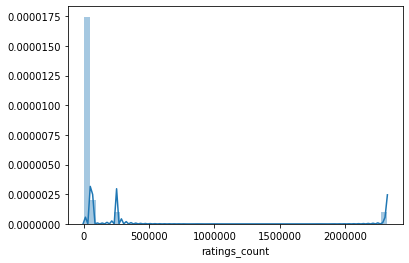

In [26]:
y = bookDataFrame['ratings_count']
sns.distplot(y)

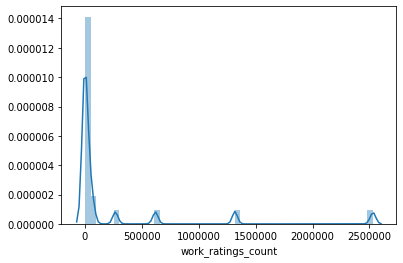

In [27]:
y = bookDataFrame['work_ratings_count']
sns.distplot(y)

In [28]:
bookDataFrame

,id,isbn,isbn13,average_rating,ratings_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count
0,5,043965548X,9780439655484,4.56,2320033,36089,2530615,3336761,49479
1,14,1400052920,9781400052929,4.22,4893,454,1318454,2052854,27347
2,21,076790818X,9780767908184,4.21,246838,9332,269003,600665,11322
3,25,076790382X,9780767903820,3.90,49153,2203,55571,89880,2732
4,40,193337201X,9781933372013,3.61,1251,208,1453,3021,229
5,45,097669400X,9780976694007,3.84,1428,59,2065,3915,106
6,51,1557344493,9781557344496,4.00,36,2,36,66,2
7,54,1575606240,9781575606248,4.33,6,0,6,12,0
8,55,1595580271,9781595580276,3.45,99,16,122,226,24
9,57,1595962808,9781595962805,3.75,166,4,170,422,4


In [29]:
# exporting new .csv file, booksnew.csv
bookDataFrame.to_csv("booksnew.csv",encoding="utf-8",index=False)

# Using CSV file Datasource 2

In [30]:
# We got a preacquired dataset, books.csv, to read the isbn
booksource=pd.read_csv("books.csv")

### Displaying the output

In [575]:
booksource.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.78E+12,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.78E+12,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.78E+12,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.78E+12,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.78E+12,eng,435,2149872,33964


### Checking the information of the data - data type and total number of records in each column

In [576]:
booksource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null object
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null object
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
dtypes: int64(3), object(7)
memory usage: 1.0+ MB


### How to find the missing values

In [577]:
booksource.isnull().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
# num_pages           False
ratings_count         False
text_reviews_count    False
dtype: bool

### Checking the total null values in the column using sum() function

In [578]:
booksource.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

### Checking the shape of the data

In [579]:
booksource.shape

(13719, 10)

### Checking the columns present in the data

In [580]:
booksource.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

## DATASOURCE 3 WEB SCARPING USING BEAUTIFUL SOUP

In [597]:
# importing liabraries for web scraping
import requests
from bs4 import BeautifulSoup

### The site we are going to use is https://www.goodreads.com/list/show/1.Best_Books_Ever please visit the link to get information on what is being scrapped

In [598]:
page = requests.get("https://www.goodreads.com/list/show/1.Best_Books_Ever")
soup = page.content
soup

b'<!DOCTYPE html>\n<html class="desktop\n">\n<head>\n  <title>Best Books Ever (58197 books)</title>\n\n<meta content=\'56,704 books based on 194345 votes: The Hunger Games by Suzanne Collins, Harry Potter and the Order of the Phoenix by J.K. Rowling, To Kill a Mockingbird...\' name=\'description\'>\n<meta content=\'telephone=no\' name=\'format-detection\'>\n<link href=\'https://www.goodreads.com/list/show/1.Best_Books_Ever\' rel=\'canonical\'>\n\n\n\n    <script type="text/javascript"> var ue_t0=window.ue_t0||+new Date();\n </script>\n  <script type="text/javascript">\n    var ue_mid = "A1PQBFHBHS6YH1";\n    var ue_sn = "www.goodreads.com";\n    var ue_furl = "fls-na.amazon.com";\n    var ue_sid = "638-6997562-0475252";\n    var ue_id = "6Z0YS649JWYH1AMWRRXZ";\n\n    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}functi

In [599]:
# Displaying the above format to more readable format using html parser
a=BeautifulSoup(soup,"html.parser")
print(a.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="desktop">
<head>
<title>Best Books Ever (58197 books)</title>
<meta content="56,704 books based on 194345 votes: The Hunger Games by Suzanne Collins, Harry Potter and the Order of the Phoenix by J.K. Rowling, To Kill a Mockingbird..." name="description"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.goodreads.com/list/show/1.Best_Books_Ever" rel="canonical"/>
<script type="text/javascript"> var ue_t0=window.ue_t0||+new Date();
 </script>
<script type="text/javascript">
    var ue_mid = "A1PQBFHBHS6YH1";
    var ue_sn = "www.goodreads.com";
    var ue_furl = "fls-na.amazon.com";
    var ue_sid = "638-6997562-0475252";
    var ue_id = "6Z0YS649JWYH1AMWRRXZ";

    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(m,l,h,j,i

In [600]:
# retreiving title and author name using the find_all function
titles = a.find_all('a', class_='bookTitle')
authors = a.find_all('a', class_='authorName')

In [601]:
for title, author in zip(titles, authors): 
    print("Book: ", title.get_text(), "By: " , author.get_text())

Book:  
The Hunger Games (The Hunger Games, #1)
 By:  Suzanne Collins
Book:  
Harry Potter and the Order of the Phoenix (Harry Potter, #5)
 By:  J.K. Rowling
Book:  
To Kill a Mockingbird (To Kill a Mockingbird, #1)
 By:  Harper Lee
Book:  
Pride and Prejudice
 By:  Jane Austen
Book:  
Twilight (Twilight, #1)
 By:  Stephenie Meyer
Book:  
The Book Thief
 By:  Markus Zusak
Book:  
Animal Farm
 By:  George Orwell
Book:  
The Chronicles of Narnia (Chronicles of Narnia, #1-7)
 By:  C.S. Lewis
Book:  
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings
 By:  J.R.R. Tolkien
Book:  
Gone with the Wind
 By:  Margaret Mitchell
Book:  
The Fault in Our Stars
 By:  John Green
Book:  
The Giving Tree
 By:  Shel Silverstein
Book:  
Wuthering Heights
 By:  Emily Brontë
Book:  
The Da Vinci Code (Robert Langdon, #2)
 By:  Dan Brown
Book:  
Memoirs of a Geisha
 By:  Arthur Golden
Book:  
The Picture of Dorian Gray
 By:  Oscar Wilde
Book:  
Alice's Adventures in Wonderland & Through t

## CONCEPTUAL MODEL

## Generating Tables by reformatting data

In [31]:
# Fetched all the rows and first four columns using slicing
book_title = bookDataFrame.iloc[:,:4]
book_title

,id,isbn,isbn13,average_rating
0,5,043965548X,9780439655484,4.56
1,14,1400052920,9781400052929,4.22
2,21,076790818X,9780767908184,4.21
3,25,076790382X,9780767903820,3.90
4,40,193337201X,9781933372013,3.61
5,45,097669400X,9780976694007,3.84
6,51,1557344493,9781557344496,4.00
7,54,1575606240,9781575606248,4.33
8,55,1595580271,9781595580276,3.45
9,57,1595962808,9781595962805,3.75


In [603]:
# Created a table average_rating using the below columns
average_rating = bookDataFrame.loc[:,['isbn','work_ratings_count','average_rating']]
average_rating

,isbn,work_ratings_count,average_rating
0,043965548X,2530582,4.56
1,1400052920,1318437,4.22
2,076790818X,269000,4.21
3,076790382X,55571,3.90
4,193337201X,1453,3.61
5,097669400X,2065,3.84
6,1557344493,36,4.00
7,1575606240,6,4.33
8,1595580271,122,3.45
9,1595962808,170,3.75


In [537]:
# Created a table all_review_count using the below columns
all_review_count = bookDataFrame.loc[:,['isbn','text_reviews_count', 'work_reviews_count','work_text_reviews_count']]
all_review_count 

,isbn,text_reviews_count,work_reviews_count,work_text_reviews_count
0,043965548X,36085,3336608,49474
1,1400052920,454,2052765,27347
2,076790818X,9332,600649,11322
3,076790382X,2203,89878,2732
4,193337201X,208,3021,229
5,097669400X,59,3915,106
6,1557344493,2,66,2
7,1575606240,0,12,0
8,1595580271,16,226,24
9,1595962808,4,422,4


### Generating CSV files (Exporting the files to the PC)

In [538]:
average_rating.to_csv("average_rating.csv",encoding="utf-8",index=False)

In [539]:
average_rating = pd.read_csv("average_rating.csv")

In [540]:
average_rating.head()

,isbn,work_ratings_count,average_rating
0,043965548X,2530518,4.56
1,1400052920,1318410,4.22
2,076790818X,268994,4.21
3,076790382X,55571,3.90
4,193337201X,1453,3.61


In [541]:
all_review_count.to_csv("all_review_count.csv",encoding="utf-8",index=False)

In [542]:
all_review_count = pd.read_csv("all_review_count.csv")

In [543]:
all_review_count.head()

,isbn,text_reviews_count,work_reviews_count,work_text_reviews_count
0,043965548X,36085,3336608,49474
1,1400052920,454,2052765,27347
2,076790818X,9332,600649,11322
3,076790382X,2203,89878,2732
4,193337201X,208,3021,229


In [544]:
book_ratings = [ 'id','isbn', 'ratings_count','work_ratings_count','average_rating']                                                           
book_ratings = pd.DataFrame(bookData.json()['books'], columns = book_ratings)                                              
book_ratings   

,id,isbn,ratings_count,work_ratings_count,average_rating
0,5,043965548X,2319945,2530518,4.56
1,14,1400052920,4893,1318410,4.22
2,21,076790818X,246830,268994,4.21
3,25,076790382X,49153,55571,3.90
4,40,193337201X,1251,1453,3.61
5,45,097669400X,1428,2065,3.84
6,51,1557344493,36,36,4.00
7,54,1575606240,6,6,4.33
8,55,1595580271,99,122,3.45
9,57,1595962808,166,170,3.75


In [545]:
book_reviews = [ 'isbn', 'text_reviews_count','work_reviews_count','work_text_reviews_count']                                                           
book_reviews = pd.DataFrame(bookData.json()['books'], columns = book_reviews)                                              
book_reviews

,isbn,text_reviews_count,work_reviews_count,work_text_reviews_count
0,043965548X,36085,3336608,49474
1,1400052920,454,2052765,27347
2,076790818X,9332,600649,11322
3,076790382X,2203,89878,2732
4,193337201X,208,3021,229
5,097669400X,59,3915,106
6,1557344493,2,66,2
7,1575606240,0,12,0
8,1595580271,16,226,24
9,1595962808,4,422,4


### Combining the two datasets over a common key(isbn) and the data remains consistent

In [546]:
book_data_combined = pd.merge(book_ratings,book_reviews,left_on='isbn',right_on='isbn')                            
book_data_combined

,id,isbn,ratings_count,work_ratings_count,average_rating,text_reviews_count,work_reviews_count,work_text_reviews_count
0,5,043965548X,2319945,2530518,4.56,36085,3336608,49474
1,14,1400052920,4893,1318410,4.22,454,2052765,27347
2,21,076790818X,246830,268994,4.21,9332,600649,11322
3,25,076790382X,49153,55571,3.90,2203,89878,2732
4,40,193337201X,1251,1453,3.61,208,3021,229
5,45,097669400X,1428,2065,3.84,59,3915,106
6,51,1557344493,36,36,4.00,2,66,2
7,54,1575606240,6,6,4.33,0,12,0
8,55,1595580271,99,122,3.45,16,226,24
9,57,1595962808,166,170,3.75,4,422,4


## ER Model

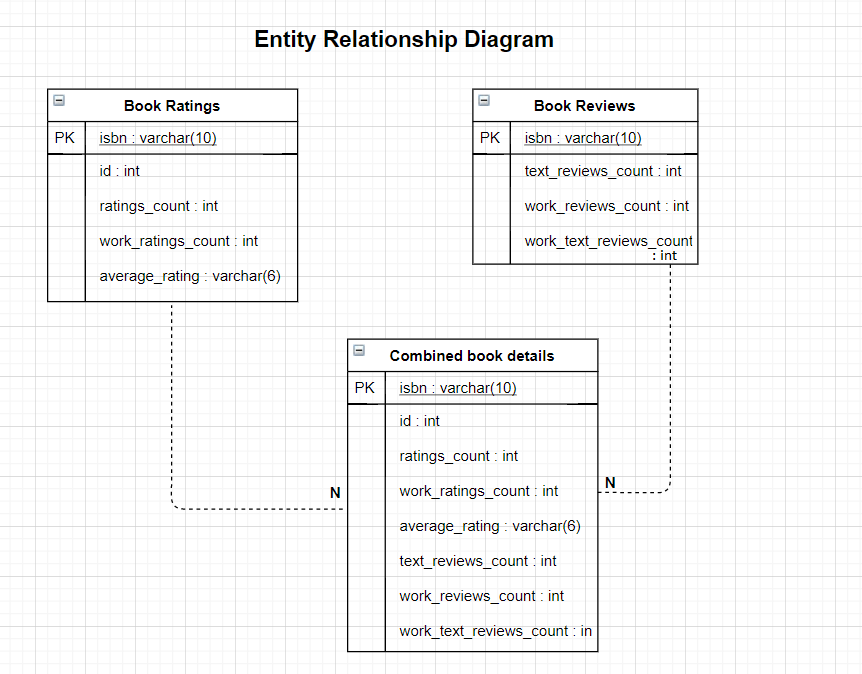

In [32]:
from IPython.display import Image
Image("C:/Users/Abhishek/Downloads/ERD.png")

### AUDIT VALIDITY/ACCURACY

Only once the data has no null or junk values can we say that it is accurate. By using commands such as drop, del and lambda functions, all the unwanted null values were deleted from the above rows and columns which gives a report on valid and accuarate data.

### AUDIT COMPLETNESS

In real world, when a list of books from a particular customer is requested, a list of it will be displayed or presented, similarly when we compare it with above data too, we get proper real time data showing correct information for all the top rated books. This can be extended for regions too like which book is popular in which region and what is the percentage of liking for that book or which age groups like the book more.

### AUDIT CONSISTENCY/UNIFORMITY

There is a uniform relationship between each of the datasets since they are linked to each other by a common attribute.

### REPORT

fies used : books.csv

files genearted: booksnew.csv, all_review_count.csv, average_rating.csv

Data is reformatted to fit into a conceptual model. Data gathered from different sources Web API, Web scraping, Raw file and are mergerd together to fit into a conceptual model.

Code used:
#### Step 1. Extraction of Data
3 main methods were used for the extraction of data:

Using the API:
Here the API key for the site was used and libraries like: request to access the website using the URL and API key ('oziLg0ZKKztlPTL0E4Q')

We got a string of isbn from the books.csv file

json to convert the file into json format

pandas to create data frames from the raw data

Using the website to scrap the data

Here the data was extracted using the sites data directly using the libraries like:
request to access the website using the URL (https://www.goodreads.com/list/show/1.Best_Books_Ever)

BeautifulSoup to scrape the contents of the website

find() and find_all() methods were used to find the desired content in the system

By loading the csv file:
Here the data was extracted using a csv file on the system using the libraries like:

Pandas to a read the csv file and load it into data frames

read_csv method is used to read .csv file

#### Step 2. Cleaning and Auditing Data
To gain knowledge about the dataset we used various methods like
describe, isnull, any, shape, columns, is_unique, info, iloc, loc, os

#### Step 3. Merging the Data
Code used for Merge

merge1 = [ 'id','isbn', 'ratings_count','work_ratings_count','average_rating']

mergeDataFrame1 = pd.DataFrame(bookData.json()['books'], columns = book_ratings)    


mergeDataFrame1

merge2 = [ 'isbn', 'text_reviews_count','work_reviews_count','work_text_reviews_count']  

mergeDataFrame2 = pd.DataFrame(bookData.json()['books'], columns = book_reviews)  
                                                          


book_data_combined = pd.merge(book_ratings,book_reviews,left_on='isbn',right_on='isbn')  

book_data_combined

### CONCLUSION

The primary focus of this assignment is to understand how to get the data from different sources, cleaning of data, checking null values present in the data, data munging and to reformatting the data to fit a conceptual database model.

### CONTRIBUTION

We contributed By Own: 30%

By External source: 30%

Provided by the TA : 40%

### CITATIONS

https://gist.github.com/kyawkn/bb2c3f6d5e181a8aade0224553878040

https://www.goodreads.com/shelf/show/

https://www.goodreads.com/api

https://swcarpentry.github.io/python-novice-gapminder/09-plotting/

https://www.kaggle.com/jealousleopard/goodreadsbooks